# 图像增广

随机增强数据
训练的时候进行图像增强
测试的时候不用增强


In [1]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

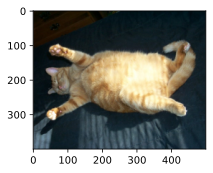

In [4]:
d2l.set_figsize()
img = d2l.Image.open('./data/cat1.jpg')
d2l.plt.imshow(img);

In [5]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

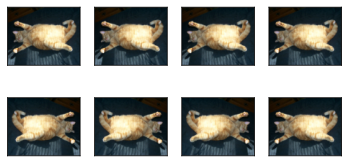

In [6]:
apply(img, torchvision.transforms.RandomHorizontalFlip()) # 随机向左向右反转

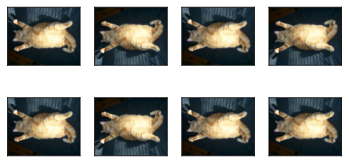

In [7]:
apply(img, torchvision.transforms.RandomVerticalFlip()) # 随机向上向下反转

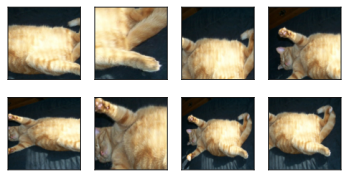

In [8]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2)) # 拆下来10%~100%大小的图片，宽高比从0.5~2之间随机取值，然后宽高都被缩放到200像素
apply(img, shape_aug)

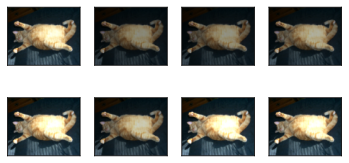

In [9]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0)) # 亮度，对比度，饱和度，色调随机调整， 他会在原始图像上     （50%）到（150%）

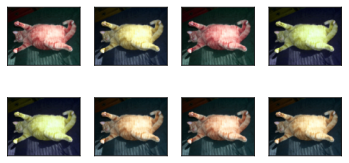

In [11]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.1)) # 这里就是 色调在 90% ~ 110%上应用

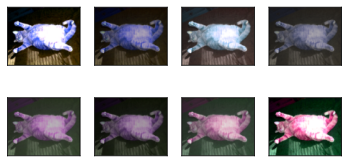

In [12]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug) # 所有东西都在（50%）到（150%）上浮动

# 微调⭐⭐⭐⭐⭐
我希望在我已经熟悉ImageNet的基础上
对我的物品进行识别
而不是重新开始

## How?
将ImageNet当中的权重复制一下
然后在ImageNet的基础之上 进行训练
![在这里插入图片描述](https://img-blog.csdnimg.cn/09d409c5a37148e6b63450a8d4886a81.png)

In [2]:
%matplotlib inline
import os
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

In [3]:
d2l.DATA_HUB['hotdog'] = (d2l.DATA_URL + 'hotdog.zip',
                         'fba480ffa8aa7e0febbb511d181409f899b9baa5')

data_dir = d2l.download_extract('hotdog') # 下载数据集

In [4]:
train_imgs = torchvision.datasets.ImageFolder(os.path.join(data_dir,'train'))
test_imgs = torchvision.datasets.ImageFolder(os.path.join(data_dir,'test'))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

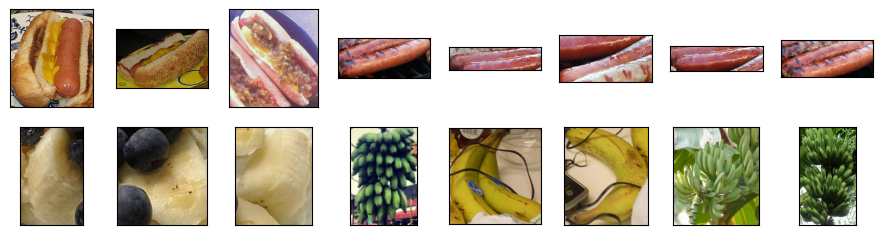

In [5]:
hotdogs = [train_imgs[i][0] for i in range(8)]
not_hotdogs = [train_imgs[-i - 1][0] for i in range(8)]
d2l.show_images(hotdogs + not_hotdogs, 2, 8, scale=1.4)

In [6]:
# 使用RGB通道的均值和标准差，以标准化每个通道
normalize = torchvision.transforms.Normalize(
    [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# 结合多种图像增广方法
train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(224), # 随机裁剪
    torchvision.transforms.RandomHorizontalFlip(), # 随机左右反转
    torchvision.transforms.ToTensor(), # 转换成Tensor
    normalize]) # 使用RGB通道的均值和标准差，以标准化每个通道

test_augs = torchvision.transforms.Compose([
    torchvision.transforms.Resize([256, 256]),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    normalize])

In [7]:
pretrained_net = torchvision.models.resnet18(pretrained=True) # 获取到预训练的模型

C:\Users\狒狒\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\狒狒\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\狒狒/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100.0%


In [8]:
pretrained_net.fc

Linear(in_features=512, out_features=1000, bias=True)

In [9]:
finetune_net = torchvision.models.resnet18(pretrained=True)
finetune_net.fc = nn.Linear(finetune_net.fc.in_features, 2) # 这变成了2分类问题，所以最后一层全连接从1000个输出换成了2个输出。
nn.init.xavier_uniform_(finetune_net.fc.weight)

C:\Users\狒狒\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\狒狒\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Parameter containing:
tensor([[-0.0393, -0.0504,  0.0788,  ..., -0.0389, -0.0442,  0.0094],
        [ 0.0927, -0.0858, -0.0945,  ...,  0.0609,  0.0469,  0.0737]],
       requires_grad=True)